# Supervised Learning-Regression
### YouTube Views Prediction

## Exploratory Data Analysis

Team:
*   Akhmad Yuzfa Salvian Idris
*   Arief Rahman Hakim
*   Bernardus Valentino
*   Milenia Nadia Afifah Puspitasari
*   Sean Frederic Wijaya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    plt.show()

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [4]:
df = pd.read_excel('youtube_statistics.xlsx')

In [5]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


Keterangan Features:

- trending_date: tanggal ketika video trending
- title: judul video
- channel_title: nama channel
- category_id: kategori video dalam label encoding
- publish_time: waktu publish video
- tags: tag yang digunakan pada video
- views: jumlah views video
- likes: jumlah likes video
- dislikes: jumlah dislikes video
- comment_count: jumlah komentar pada video
- comments_disabled: apakah status komentar dinonaktifkan pada video
- ratings_disabled: apakah rating dinonaktifkan pada video
- video_error_or_removed: apakah video error atau sudah dihapus saat ini
- description: deskripsi video
- No_tags: jumlah tags yang digunakan
- desc_len: panjang kata deskripsi video
- len_title: panjang kata judul video
- publish_date: tanggal publish video

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Kita dapat melihat bahwa :

*   Dataframe memiliki total 36791 baris dan 18 kolom
*   Dataframe masih memiliki null values di kolom description

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut.

In [7]:
cats = ['comments_disabled','ratings_disabled','video_error_or_removed']
nums = ['views','likes','dislikes','comment_count','No_tags','desc_len','len_title','category_id']

*   Feature-feature yang seharusnya merupakan kategorik: category_id
*   Feature-feature yang seharusnya datetime: trending_date dan publish_time

In [8]:
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,category_id
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,21.552173
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,6.586716
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,1.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,23.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,24.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,24.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,43.000000


*   Distribusi nilai hampir normal: No_tags, len_title, category_id
*   Distribusi nilai tidak normal: views, likes, dislikes, comment_count, desc_len

In [9]:
df[cats].describe()

,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


*   Jumlah unik dari setiap feature hanya 2 karena setiap fiturnya memiliki tipe data boolean. Ada kemungkinan akan berguna untuk klasifikasi.

In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom comments_disabled:
False    35611
True      1180
Name: comments_disabled, dtype: int64

Value count kolom ratings_disabled:
False    36034
True       757
Name: ratings_disabled, dtype: int64

Value count kolom video_error_or_removed:
False    36780
True        11
Name: video_error_or_removed, dtype: int64



*   Keseluruhan feature didominasi oleh satu value, yakni FALSE

### Univariate Analysis (Numerical Variabels)

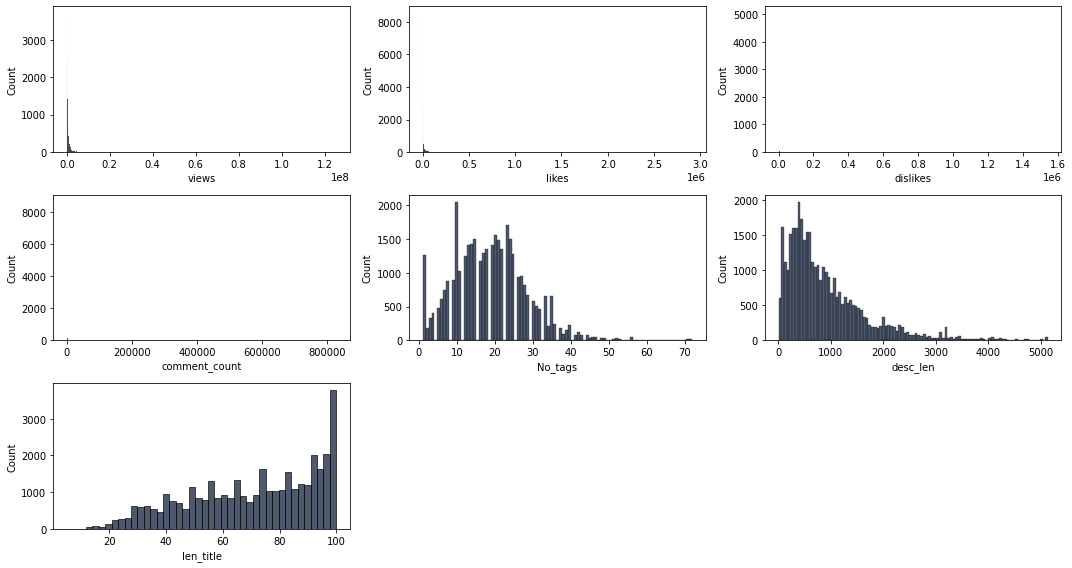

In [11]:
columns = ['views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 8))
for i in range(0, len(columns)):
    plt.subplot(3 , 3, i+1)
    sns.histplot(df[columns[i]], color='#14213d')
    plt.tight_layout()
plt.show()

Plot histogram untuk feature views, likes, dislikes, dan comment_count tidak terlihat sehingga tidak ada informasi yang bisa kita dapatkan. Kami menduga banyak outlier pada feature-feature tersebut. Hal tersebut dapat dibuktikan oleh boxplot di bawah ini.

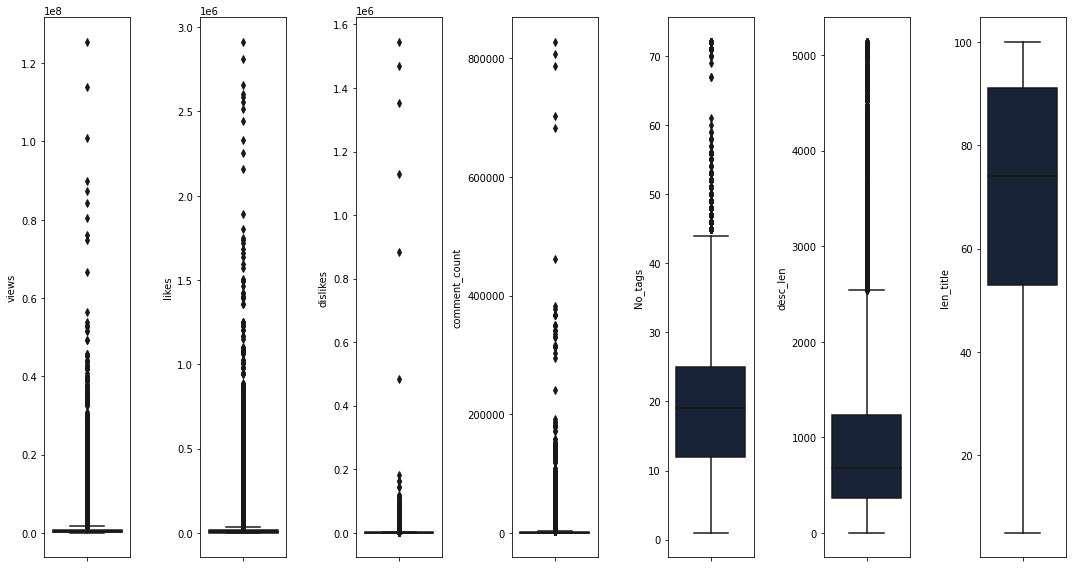

In [12]:
plt.figure(figsize=(15, 8))
for i in range(0, len(columns)):
    plt.subplot(1, len(columns), i+1)
    sns.boxplot(y=df[columns[i]], color='#14213d', orient='v')
    plt.tight_layout()

- Semua feature memiliki outlier kecuali feature len_title.
- Dari boxplot, semua feature berdistribusi right skewed, kecuali len_title berdistribusi left skewed.

#### Video Title Length

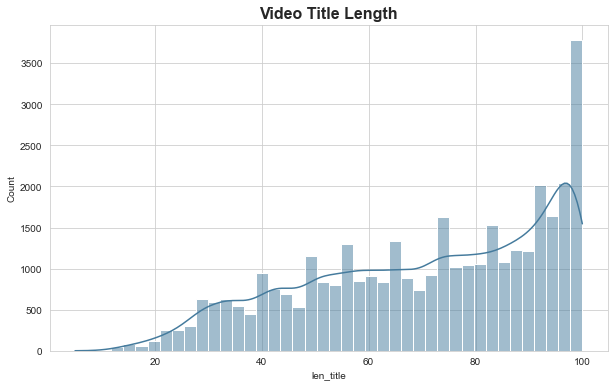

In [9]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='len_title', color='#457b9d', kde = True)
plt.title('Video Title Length', fontsize = 16, fontweight='bold')
plt.savefig ("Video Title Length.jpg")

In [14]:
df['len_title'].mean() 

70.60936098502351

- Rata-rata panjang judul video: 70.61 karakter
- Content creator Youtube cenderung memaksimalkan limit untuk membuat judul video

#### Video Description Length

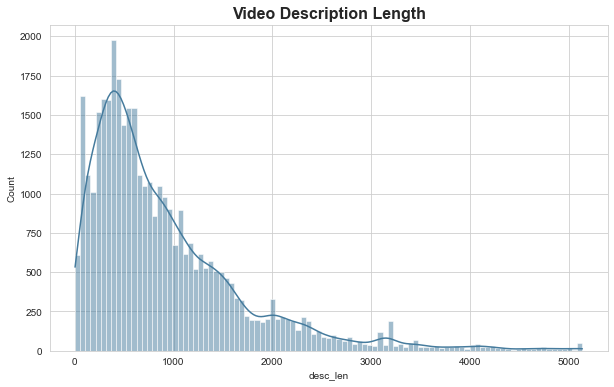

In [10]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='desc_len', color='#457b9d', kde = True)
plt.title('Video Description Length', fontsize = 16, fontweight='bold')
plt.savefig ("Video Description Length.jpg")

In [16]:
df['desc_len'].mean() 

923.0791226115083

- Rata-rata panjang judul video: 923.08 karakter
- Kebanyakan content creator Youtube tidak terlalu banyak memberikan deskripsi pada videonya

### Univariate Analysis (Categorical Variabels)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


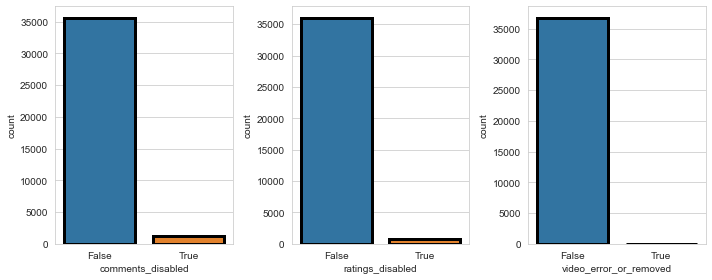

In [20]:
plt.figure(figsize=(10, 4))
column2 = ['comments_disabled','ratings_disabled','video_error_or_removed']

for i in range(0, len(column2)):
    plt.subplot(1, 3, i+1)
    sns.countplot(df[column2[i]], orient='v',edgecolor='black',linewidth=3)
    plt.tight_layout()

plt.savefig ("Univariate Analysis.jpg")

Kebanyakan content creator Youtube tidak menutup fitur comments, ratings, dan memiliki video error atau menghapus video

### Bivariate Analysis

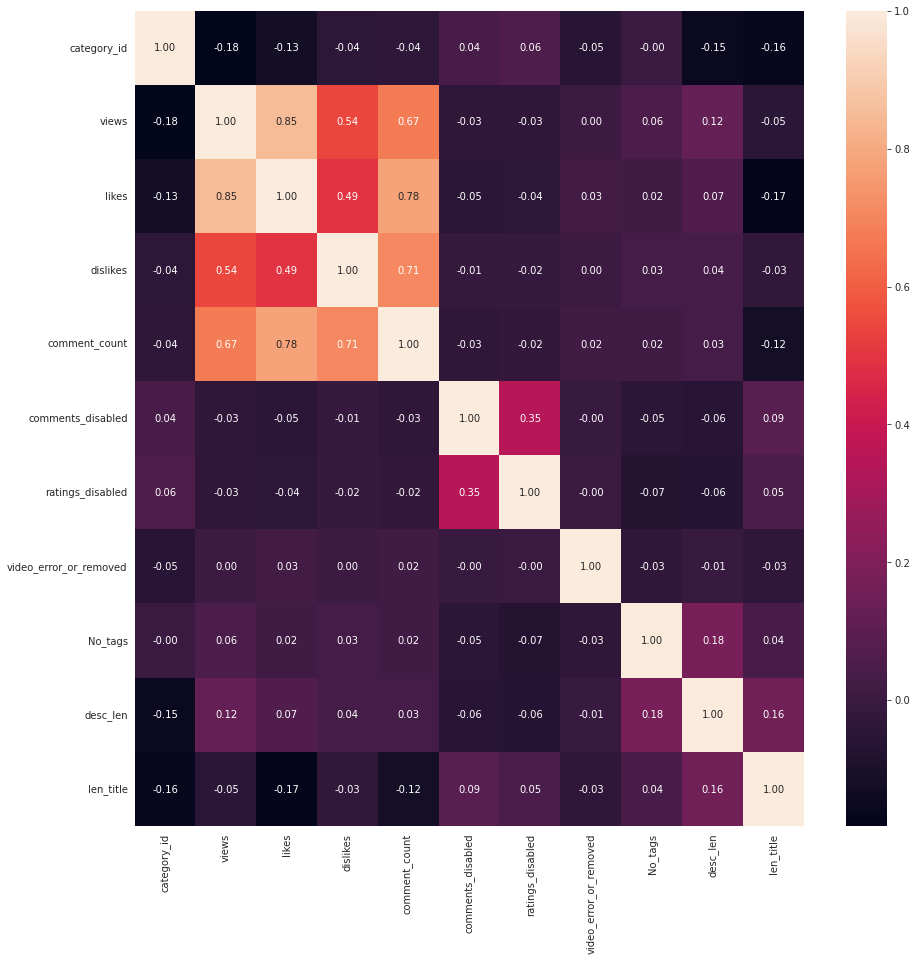

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='rocket', annot=True, fmt='.2f')
plt.show()

Dari correlation heatmap di atas dapat dilihat bahwa:

*   Top 3 feature yang berkorelasi kuat dengan target: likes, dislikes, dan comment_count
*   Feature selain top 3 feature memiliki korelasi yang lemah dengan target sehingga mungkin nantinya fitur-fitur ini dapat diabaikan
*   Feature yang saling berkorelasi kuat/redundan (>0.5): likes dan comment_count, dislikes dan comment_count. Nantinya salah satu dari variabel yang berkorelasi akan didrop (akan dilihat dari nilai VIF (Variance Inflation Factor) nya).

Kemungkinan feature yang didrop: comment_count

### EDA Conclusions

*  Dataframe memiliki total 36791 baris dan 18 kolom 
*  Terdapat missing values di kolom description sehingga harus diurus ketika preprocessing
*  Feature-feature yang seharusnya merupakan kategorik yakni category_id
*  Feature-feature yang seharusnya datetime: trending_date dan publish_time
*  Semua feature memiliki outlier kecuali feature len_title
*  Distribusi nilai hampir normal: No_tags, len_title, category_id
*  Distribusi nilai tidak normal: views, likes, dislikes, comment_count, desc_len
*  Dari boxplot, semua feature berdistribusi right skewed, kecuali len_title berdistribusi left skewed
*   Jumlah unik dari setiap feature hanya 2 karena setiap fiturnya memiliki tipe data boolean. Ada kemungkinan akan berguna untuk klasifikasi
*   Keseluruhan feature didominasi oleh satu value, yakni FALSE
*   Top 3 feature yang berkorelasi kuat dengan target: likes, dislikes, dan comment_count
*   Feature selain top 3 feature memiliki korelasi yang lemah dengan target sehingga mungkin nantinya fitur-fitur ini dapat diabaikan
*   Feature yang saling berkorelasi kuat/redundan (>0.5): likes dan comment_count, dislikes dan comment_count. Nantinya salah satu dari variabel yang berkorelasi akan didrop (akan dilihat dari nilai VIF (Variance Inflation Factor) nya)
*   Kemungkinan feature yang didrop: comment_count

## Data Preprocessing

In [19]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


### Merubah Tipe Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [21]:
df['category_id'] = df['category_id'].astype('str')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  object        
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [23]:
cats = ['comments_disabled','ratings_disabled','video_error_or_removed','category_id']
nums = ['views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [24]:
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [25]:
df[cats].describe()

,comments_disabled,ratings_disabled,video_error_or_removed,category_id
count,36791,36791,36791,36791
unique,2,2,2,17
top,False,False,False,24
freq,35611,36034,36780,16462


### Missing Value

In [26]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [27]:
df.dropna(inplace=True, subset=['description'])
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### Duplicated Data

In [28]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

4228
0


### Outliers

Menggunakan Z-score

In [29]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['likes','dislikes','comment_count','No_tags','desc_len']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 32518
Jumlah baris setelah memfilter outlier: 31041


### Normalization/Standardization

In [30]:
df.describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.104100e+04,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000
mean,7.375504e+05,15811.594440,970.334880,1381.900776,18.445314,839.767791,71.143423
std,1.587101e+06,38469.388576,2429.564984,3568.833452,9.271168,662.605720,22.094598
min,4.024000e+03,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000
25%,1.129710e+05,761.000000,97.000000,69.000000,11.000000,357.000000,54.000000
50%,2.681260e+05,2638.000000,281.000000,282.000000,18.000000,652.000000,75.000000
75%,6.835370e+05,10788.000000,862.000000,1058.000000,24.000000,1155.000000,91.000000
max,3.570224e+07,317507.000000,52287.000000,46855.000000,48.000000,3326.000000,100.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['likes_std'] = StandardScaler().fit_transform(df['likes'].values.reshape(len(df), 1))
df['dislikes_std'] = StandardScaler().fit_transform(df['dislikes'].values.reshape(len(df), 1))
df['comment_count_std'] = StandardScaler().fit_transform(df['comment_count'].values.reshape(len(df), 1))
df['No_tags_std'] = StandardScaler().fit_transform(df['No_tags'].values.reshape(len(df), 1))
df['desc_len_std'] = StandardScaler().fit_transform(df['desc_len'].values.reshape(len(df), 1))
df['len_title_std'] = StandardScaler().fit_transform(df['len_title'].values.reshape(len(df), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [32]:
df.describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std
count,3.104100e+04,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04
mean,7.375504e+05,15811.594440,970.334880,1381.900776,18.445314,839.767791,71.143423,-4.758475e-16,2.359139e-16,1.366847e-16,-5.279076e-16,-6.332395e-16,6.005169e-18
std,1.587101e+06,38469.388576,2429.564984,3568.833452,9.271168,662.605720,22.094598,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,4.024000e+03,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,-4.110242e-01,-3.993927e-01,-3.872198e-01,-1.881704e+00,-1.262865e+00,-2.993695e+00
25%,1.129710e+05,761.000000,97.000000,69.000000,11.000000,357.000000,54.000000,-3.912419e-01,-3.594672e-01,-3.678855e-01,-8.030740e-01,-7.286016e-01,-7.759227e-01
50%,2.681260e+05,2638.000000,281.000000,282.000000,18.000000,652.000000,75.000000,-3.424491e-01,-2.837323e-01,-3.082011e-01,-4.803294e-02,-2.833824e-01,1.745512e-01
75%,6.835370e+05,10788.000000,862.000000,1058.000000,24.000000,1155.000000,91.000000,-1.305889e-01,-4.459096e-02,-9.075963e-02,5.991451e-01,4.757539e-01,8.987218e-01
max,3.570224e+07,317507.000000,52287.000000,46855.000000,48.000000,3326.000000,100.000000,7.842606e+00,2.112209e+01,1.274193e+01,3.187857e+00,3.752265e+00,1.306068e+00


In [33]:
df.drop(columns=['likes','dislikes','comment_count','No_tags','desc_len','len_title'], inplace=True)
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,False,False,False,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940


In [34]:
df.describe()

,views,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std
count,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04,3.104100e+04
mean,7.375504e+05,-4.758475e-16,2.359139e-16,1.366847e-16,-5.279076e-16,-6.332395e-16,6.005169e-18
std,1.587101e+06,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,4.024000e+03,-4.110242e-01,-3.993927e-01,-3.872198e-01,-1.881704e+00,-1.262865e+00,-2.993695e+00
25%,1.129710e+05,-3.912419e-01,-3.594672e-01,-3.678855e-01,-8.030740e-01,-7.286016e-01,-7.759227e-01
50%,2.681260e+05,-3.424491e-01,-2.837323e-01,-3.082011e-01,-4.803294e-02,-2.833824e-01,1.745512e-01
75%,6.835370e+05,-1.305889e-01,-4.459096e-02,-9.075963e-02,5.991451e-01,4.757539e-01,8.987218e-01
max,3.570224e+07,7.842606e+00,2.112209e+01,1.274193e+01,3.187857e+00,3.752265e+00,1.306068e+00


### Feature encoding

In [35]:
df[cats].describe()

,comments_disabled,ratings_disabled,video_error_or_removed,category_id
count,31041,31041,31041,31041
unique,2,2,2,17
top,False,False,False,24
freq,29968,30357,31036,13976


#### Label Encoding

In [36]:
df['comments_disabled_label'] = df['comments_disabled'].astype('category').cat.codes
df['ratings_disabled_label'] = df['ratings_disabled'].astype('category').cat.codes
df['video_error_or_removed_label'] = df['video_error_or_removed'].astype('category').cat.codes

In [37]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,False,False,False,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0


In [38]:
df.drop(columns=['comments_disabled','ratings_disabled','video_error_or_removed'], inplace=True)
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,2018-06-14,There Is One Relation Above All,ActorVarunPruthi,24,11:04:45,"varun pruthi|""actor varun pruthi""|""actor varun...",90643,"There is one Relation above all, Relation of H...",2018-06-13,0.058448,-0.331478,0.780688,-1.234526,-1.068175,-1.816918,0,0,0
36739,2018-06-14,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,24,13:54:39,"funny videos|""hotels""|""comedy""|""comedy video""|...",2675706,Maggu is preparing for Sharda University inter...,2018-06-08,2.097114,1.321519,1.471681,2.001364,0.842494,0.038769,0,0,0
36740,2018-06-14,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,17,03:09:21,"wwe|""world wrestling entertainment""|""wrestling...",770873,The Miz serves as special guest referee in thi...,2018-06-13,-0.064873,-0.172188,-0.057975,1.354186,-0.784443,0.717679,0,0,0
36758,2018-06-14,What If PubG Was Made In India ?,Angry Prash,23,08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,This funny video is about what if players unkn...,2018-06-11,1.814183,1.525674,1.750208,-0.587348,-0.601827,-1.771657,0,0,0


#### One Hot Encoding

In [39]:
col = ['category_id']
for cat in col:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [40]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
df.drop(columns=['category_id'], inplace=True)
df

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,2018-06-14,There Is One Relation Above All,ActorVarunPruthi,11:04:45,"varun pruthi|""actor varun pruthi""|""actor varun...",90643,"There is one Relation above all, Relation of H...",2018-06-13,0.058448,-0.331478,0.780688,-1.234526,-1.068175,-1.816918,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36739,2018-06-14,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,13:54:39,"funny videos|""hotels""|""comedy""|""comedy video""|...",2675706,Maggu is preparing for Sharda University inter...,2018-06-08,2.097114,1.321519,1.471681,2.001364,0.842494,0.038769,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36740,2018-06-14,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,03:09:21,"wwe|""world wrestling entertainment""|""wrestling...",770873,The Miz serves as special guest referee in thi...,2018-06-13,-0.064873,-0.172188,-0.057975,1.354186,-0.784443,0.717679,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36758,2018-06-14,What If PubG Was Made In India ?,Angry Prash,08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,This funny video is about what if players unkn...,2018-06-11,1.814183,1.525674,1.750208,-0.587348,-0.601827,-1.771657,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31041 entries, 0 to 36769
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   trending_date                 31041 non-null  object        
 1   title                         31041 non-null  object        
 2   channel_title                 31041 non-null  object        
 3   publish_time                  31041 non-null  object        
 4   tags                          31041 non-null  object        
 5   views                         31041 non-null  int64         
 6   description                   31041 non-null  object        
 7   publish_date                  31041 non-null  datetime64[ns]
 8   likes_std                     31041 non-null  float64       
 9   dislikes_std                  31041 non-null  float64       
 10  comment_count_std             31041 non-null  float64       
 11  No_tags_std                 

## Feature Engineering

#### Prime time for uploading Youtube video

Source: https://influencermarketinghub.com/best-times-to-publish-youtube-videos/

In [43]:
df['Hour'] = df['publish_time'].str[:2]
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,Hour
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,05


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31041 entries, 0 to 36769
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   trending_date                 31041 non-null  object        
 1   title                         31041 non-null  object        
 2   channel_title                 31041 non-null  object        
 3   publish_time                  31041 non-null  object        
 4   tags                          31041 non-null  object        
 5   views                         31041 non-null  int64         
 6   description                   31041 non-null  object        
 7   publish_date                  31041 non-null  datetime64[ns]
 8   likes_std                     31041 non-null  float64       
 9   dislikes_std                  31041 non-null  float64       
 10  comment_count_std             31041 non-null  float64       
 11  No_tags_std                 

In [45]:
# daypart function
def daypart(Hour):
    if Hour in ['9','10','11','14','15','16']:
        return 1
    else: return 0
    
df['is_prime'] = df['Hour'].apply(daypart)
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,Hour,is_prime
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,05,0


In [46]:
df.drop(columns=['Hour'], inplace=True)

In [47]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 2.	Delay between uploading YouTube videos and videos becoming trending (day(s))

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31041 entries, 0 to 36769
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   trending_date                 31041 non-null  object        
 1   title                         31041 non-null  object        
 2   channel_title                 31041 non-null  object        
 3   publish_time                  31041 non-null  object        
 4   tags                          31041 non-null  object        
 5   views                         31041 non-null  int64         
 6   description                   31041 non-null  object        
 7   publish_date                  31041 non-null  datetime64[ns]
 8   likes_std                     31041 non-null  float64       
 9   dislikes_std                  31041 non-null  float64       
 10  comment_count_std             31041 non-null  float64       
 11  No_tags_std                 

In [49]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
df['trending_date'] = df['trending_date'].astype('datetime64')
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
df['into_trending'] = df['trending_date'] - df['publish_date']
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime,into_trending
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2 days
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1 days


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31041 entries, 0 to 36769
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   trending_date                 31041 non-null  datetime64[ns] 
 1   title                         31041 non-null  object         
 2   channel_title                 31041 non-null  object         
 3   publish_time                  31041 non-null  object         
 4   tags                          31041 non-null  object         
 5   views                         31041 non-null  int64          
 6   description                   31041 non-null  object         
 7   publish_date                  31041 non-null  datetime64[ns] 
 8   likes_std                     31041 non-null  float64        
 9   dislikes_std                  31041 non-null  float64        
 10  comment_count_std             31041 non-null  float64        
 11  No_tags_std    

In [53]:
df['into_trending'] = df['into_trending'].astype('str')
df['into_trending'] = df['into_trending'].str.split().str[0]

In [54]:
df['into_trending'] = df['into_trending'].astype('int')
df

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime,into_trending
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,2018-06-14,There Is One Relation Above All,ActorVarunPruthi,11:04:45,"varun pruthi|""actor varun pruthi""|""actor varun...",90643,"There is one Relation above all, Relation of H...",2018-06-13,0.058448,-0.331478,0.780688,-1.234526,-1.068175,-1.816918,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
36739,2018-06-14,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,13:54:39,"funny videos|""hotels""|""comedy""|""comedy video""|...",2675706,Maggu is preparing for Sharda University inter...,2018-06-08,2.097114,1.321519,1.471681,2.001364,0.842494,0.038769,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6
36740,2018-06-14,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,03:09:21,"wwe|""world wrestling entertainment""|""wrestling...",770873,The Miz serves as special guest referee in thi...,2018-06-13,-0.064873,-0.172188,-0.057975,1.354186,-0.784443,0.717679,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
36758,2018-06-14,What If PubG Was Made In India ?,Angry Prash,08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,This funny video is about what if players unkn...,2018-06-11,1.814183,1.525674,1.750208,-0.587348,-0.601827,-1.771657,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3


In [55]:
lag = []
for index, column in df.iterrows():
    if column['into_trending'] <=2:
        a = 1
    else:
        a = 0
    lag.append(a)

In [56]:
df['into_trending'] = lag

In [57]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_std,dislikes_std,comment_count_std,No_tags_std,desc_len_std,len_title_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,category_id_1,category_id_10,category_id_15,category_id_17,category_id_19,category_id_2,category_id_20,category_id_22,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,is_prime,into_trending
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,0.471926,-0.070934,-0.140076,-0.371622,0.121088,0.446115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,-0.391918,-0.027304,-0.387220,0.059830,2.101181,-0.594880,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,-0.358748,-0.299373,-0.345469,-0.479485,-0.539949,-0.594880,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,This video showcases the difference between pe...,2017-11-12,1.417810,0.269050,0.364859,0.167693,-0.870468,-1.862179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,-0.398235,-0.278793,-0.368726,-0.803074,-0.130951,0.762940,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Drop Fitur Menggunakan VIF

https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

In [58]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['likes_std', 'dislikes_std',
       'comment_count_std', 'No_tags_std', 'desc_len_std', 'len_title_std',
       'comments_disabled_label', 'ratings_disabled_label',
       'video_error_or_removed_label', 'category_id_1', 'category_id_10',
       'category_id_15', 'category_id_17', 'category_id_19', 'category_id_2',
       'category_id_20', 'category_id_22', 'category_id_23', 'category_id_24',
       'category_id_25', 'category_id_26', 'category_id_27', 'category_id_28',
       'category_id_29', 'category_id_30', 'category_id_43','is_prime','into_trending']]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,Column
0,4.836899,likes_std
2,4.659334,comment_count_std
18,2.497225,category_id_24
1,2.007979,dislikes_std
19,1.566980,category_id_25
10,1.463858,category_id_10
17,1.393898,category_id_23
16,1.233748,category_id_22
5,1.224710,len_title_std
6,1.192082,comments_disabled_label


Keseluruhan fitur di atas akan digunakan untuk modeling karena nilai VIF < 10

## Feature Selection

In [59]:
X = df[['likes_std', 'dislikes_std',
       'comment_count_std', 'No_tags_std', 'desc_len_std', 'len_title_std',
       'comments_disabled_label', 'ratings_disabled_label',
       'video_error_or_removed_label', 'category_id_1', 'category_id_10',
       'category_id_15', 'category_id_17', 'category_id_19', 'category_id_2',
       'category_id_20', 'category_id_22', 'category_id_23', 'category_id_24',
       'category_id_25', 'category_id_26', 'category_id_27', 'category_id_28',
       'category_id_29', 'category_id_30', 'category_id_43','is_prime','into_trending']]
Y = df[['views']]

## Membagi Data Test dan Data Training

In [60]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [61]:
df.shape

(31041, 36)

In [62]:
xtrain.shape

(24832, 28)

In [63]:
xtest.shape

(6209, 28)

## Modeling

## 1. Simple Linear Regression

In [64]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [65]:
print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

pred = regressor.predict(xtest)
eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [[  858931.97840329   660324.33602669  -247427.46464089    51683.89147162
     50446.67137413    82234.60978086   -71760.91979081   186907.30007683
  -1710511.44885921   456121.86374283    67411.79803489 -1210502.48295628
    356461.24550798  -144173.12262966   -41955.59753232   905925.10789829
    -88774.16311784  -699619.56675317  -102247.05617055  -120066.07917562
     85985.11579868  -347520.27890616   -78914.45535263  -292361.62268312
   1030652.06260672   223577.23168795   -77605.91522891  -317064.13080594]]
Intercept: 
 [1091124.57260879]
MAE: 450114.15
RMSE: 1042959.50
R2 score: 0.62


Coefficient could be interpret as feature importance in linear regression

In [66]:
print("train Accuracy : ",regressor.score(xtrain,ytrain))
print("test Accuracy : ",regressor.score(xtest,ytest))

train Accuracy :  0.6415463976549118
test Accuracy :  0.6176364990240735


In [67]:
ypred_train = regressor.predict(xtrain)
ypred_test = regressor.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042959.5
RMSE (Train Set): 934646.65


Best fit tetapi nilai R2 masih rendah

Dicoba menggunakan model Ridge, Lasso, dan Elastic Net

### Ridge

In [68]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

pred = ridge_model.predict(xtest)
eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 450020.98
RMSE: 1042940.50
R2 score: 0.62


In [69]:
print("train Accuracy : ",round(ridge_model.score(xtrain,ytrain),2))
print("test Accuracy : ",round(ridge_model.score(xtest,ytest),2))

train Accuracy :  0.64
test Accuracy :  0.62


In [70]:
ypred_train = ridge_model.predict(xtrain)
ypred_test = ridge_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042940.5
RMSE (Train Set): 934666.3


Best fit tetapi nilai R2 masih rendah

### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Ridge Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- alpha: nilai/koefisien regularization
- solver: metode bagaimana kita melakukan update pada variable di ridge regression (slope/intercept): sag/saga lebih cocok jika data dalam jumlah besar
    - {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, hyperparameters, cv=5, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [72]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 449953.18
RMSE: 1042957.53
R2 score: 0.62


In [73]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042957.53
RMSE (Train Set): 934699.81


In [74]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best solver: auto
Best alpha: 2


### Lasso

In [75]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 450108.75
RMSE: 1042958.64
R2 score: 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.095e+15, tolerance: 6.052e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [76]:
print("train Accuracy : ",round(lasso_model.score(xtrain,ytrain),2))
print("test Accuracy : ",round(lasso_model.score(xtest,ytest),2))

train Accuracy :  0.64
test Accuracy :  0.62


In [77]:
ypred_train = lasso_model.predict(xtrain)
ypred_test = lasso_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042958.64
RMSE (Train Set): 934646.67


### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Lasso Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- alpha: nilai/koefisien regularization
- solver: {‘cyclic’, ‘random’}

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+15, tolerance: 4.980e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+15, tolerance: 4.550e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.

In [79]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 450113.99
RMSE: 1042959.47
R2 score: 0.62


In [80]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042959.47
RMSE (Train Set): 934646.66


In [81]:
print('Best selection:', best_model.best_estimator_.get_params()['selection'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best selection: cyclic
Best alpha: 0.03


### Elastic Net

In [82]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 466377.51
RMSE: 1146232.18
R2 score: 0.54


In [83]:
print("train Accuracy : ",round(elasticnet_model.score(xtrain,ytrain),2))
print("test Accuracy : ",round(elasticnet_model.score(xtest,ytest),2))

train Accuracy :  0.58
test Accuracy :  0.54


In [84]:
ypred_train = elasticnet_model.predict(xtrain)
ypred_test = elasticnet_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.54
R2 score (Train Set): 0.58
RMSE (Test Set): 1146232.18
RMSE (Train Set): 1015363.88


### Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Elastic Net:</b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
- alpha: nilai/koefisien regularization
- solver: {‘cyclic’, ‘random’}
- l1_ratio: rasio dari penggunaan l1 norm (lasso). default: 0.5
    - jika l1_ratio == 1, maka sepenuhnya menggunakan l1 norm
    - jika l2_ratio == 0, maka sepenuhnya menggunakan l2 norm

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advi

In [86]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 450103.05
RMSE: 1042954.96
R2 score: 0.62


In [87]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.62
R2 score (Train Set): 0.64
RMSE (Test Set): 1042954.96
RMSE (Train Set): 934646.95


In [88]:
print('Best selection:', best_model.best_estimator_.get_params()['selection'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best selection: cyclic
Best alpha: 1e-05


## 2. Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
ypred_test = dt.predict(xtest)
eval_regression(dt, ypred_test, xtrain, ytrain, xtest, ytest)

MAE: 266198.90
RMSE: 704696.20
R2 score: 0.83


In [90]:
from sklearn.metrics import precision_score
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.83
R2 score (Train Set): 1.0
RMSE (Test Set): 704696.2
RMSE (Train Set): 4522.53


Overfit

#### Hyperparameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ['mse'],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=42)
model = RandomizedSearchCV(dt,param_grid, cv=5)
model.fit(xtrain, ytrain)

# Predict & Evaluation
ypred_test = model.predict(xtest)
eval_regression(model, ypred_test, xtrain, ytrain, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

MAE: 332009.75
RMSE: 891422.55
R2 score: 0.72


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [92]:
from sklearn.metrics import precision_score
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.72
R2 score (Train Set): 0.78
RMSE (Test Set): 891422.55
RMSE (Train Set): 732181.36


## 3. Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE: 211598.10
RMSE: 539586.77
R2 score: 0.90


In [94]:
from sklearn.metrics import precision_score
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): 0.9
R2 score (Train Set): 0.99
RMSE (Test Set): 539586.77
RMSE (Train Set): 190188.45


Bestfit

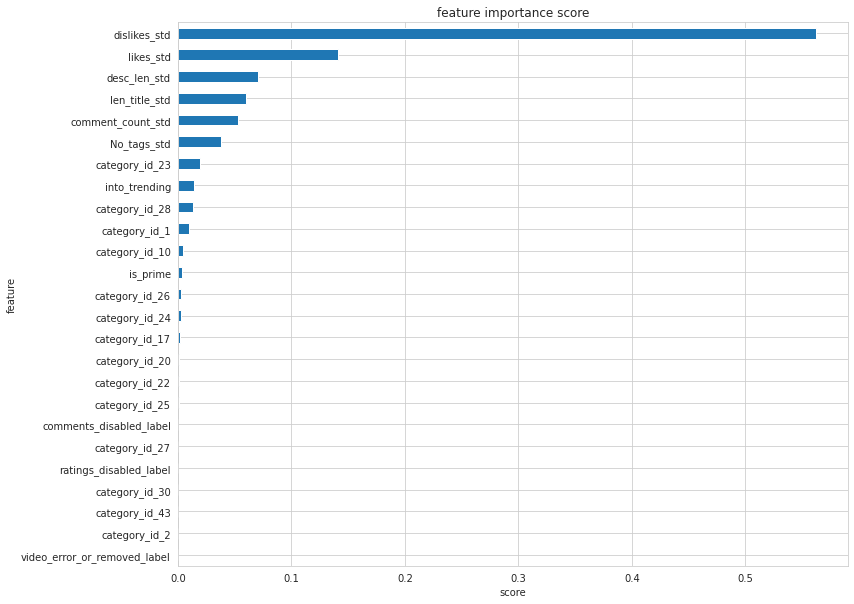

In [95]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(12, 10))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
show_feature_importance(rf)

## 4. Support Vector Regressor

In [96]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 642495.99
RMSE: 1758135.50
R2 score: -0.09


In [97]:
from sklearn.metrics import precision_score
ypred_train = svr.predict(xtrain)
ypred_test = svr.predict(xtest)
print("R2 score (Test Set): " +str(round(r2_score(ytest, ypred_test),2)))
print("R2 score (Train Set): " +str(round(r2_score(ytrain, ypred_train),2)))
print("RMSE (Test Set): " +str(round(mean_squared_error(ytest, ypred_test, squared=False),2)))
print("RMSE (Train Set): " +str(round(mean_squared_error(ytrain, ypred_train, squared=False),2)))

R2 score (Test Set): -0.09
R2 score (Train Set): -0.09
RMSE (Test Set): 1758135.5
RMSE (Train Set): 1627707.42


## Model Conclusion

1. **Linear Regression**
    - R2 score (Test Set): 0.62
    - R2 score (Train Set): 0.64
    - RMSE (Test Set): 1042959.5
    - RMSE (Train Set): 934646.65
    - Result: Bestfit tetapi nilai masih rendah


      Ridge Model
      - R2 score (Test Set): 0.62
      - R2 score (Train Set): 0.64
      - RMSE (Test Set): 1042940.5
      - RMSE (Train Set): 934666.3
      
      Ridge - Hyperparameter Tuning
      - R2 score (Test Set): 0.62
      - R2 score (Train Set): 0.64
      - RMSE (Test Set): 1042957.53
      - RMSE (Train Set): 934699.81
      
      
      Lasso Model
      - R2 score (Test Set): 0.62
      - R2 score (Train Set): 0.64
      - RMSE (Test Set): 1042958.64
      - RMSE (Train Set): 934646.67

      Lasso - Hyperparameter Tuning
      - R2 score (Test Set): 0.62
      - R2 score (Train Set): 0.64
      - RMSE (Test Set): 1042959.47
      - RMSE (Train Set): 934646.66


      Elastic Net Model
      - R2 score (Test Set): 0.54
      - R2 score (Train Set): 0.58
      - RMSE (Test Set): 1146232.18
      - RMSE (Train Set): 1015363.88
      
      Elastic Net - Hyperparameter Tuning
      - R2 score (Test Set): 0.62
      - R2 score (Train Set): 0.64
      - RMSE (Test Set): 1042954.96
      - RMSE (Train Set): 934646.95


2. **Decision Tree Regressor**
    - R2 score (Test Set): 0.83
    - R2 score (Train Set): 1.0
    - RMSE (Test Set): 704696.2
    - RMSE (Train Set): 4522.53
    - Result: Overfit

    Hyperparameter Tuning
    - R2 score (Test Set): 0.72
    - R2 score (Train Set): 0.78
    - RMSE (Test Set): 891422.55
    - RMSE (Train Set): 732181.36
    - Result: Bestfit tetapi nilai masih rendah
    


3. **Random Forest**
    - R2 score (Test Set): 0.9
    - R2 score (Train Set): 0.99
    - RMSE (Test Set): 539586.77
    - RMSE (Train Set): 190188.45
    - Result: Bestfit
    
    
4. **SVR**
    - R2 score (Test Set): -0.09
    - R2 score (Train Set): -0.09
    - RMSE (Test Set): 1758135.5
    - RMSE (Train Set): 1627707.42
    - Result: Bad Model

# Best Model

Random Forest
- R2 score (Test Set): 0.9
- R2 score (Train Set): 0.99
- RMSE (Test Set): 539586.77
- RMSE (Train Set): 190188.45
- Result: Bestfit